In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchinfo as ti
import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from simple_cnn import SimpleCNN

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [12]:
# Load MNIST dataset from torchvision
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [13]:
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
test_images = mnist_test.data.numpy()
test_labels = mnist_test.targets.numpy()

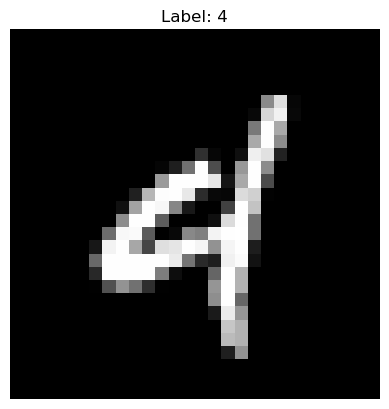

In [14]:
# Load random image from training set to visualize
random_index = np.random.randint(0, len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

# Visualize the random image
plt.imshow(random_image, cmap='gray')
plt.title(f'Label: {random_label}')
plt.axis('off')
plt.show()

In [15]:
# Data loaders
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_images).unsqueeze(1).float()/255.0, torch.tensor(train_labels))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_images).unsqueeze(1).float()/255.0, torch.tensor(test_labels))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [16]:
model = SimpleCNN().to(device)
# Model summarize
ti.summary(model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 28, 28]           320
├─MaxPool2d: 1-2                         [1, 32, 14, 14]           --
├─Conv2d: 1-3                            [1, 64, 14, 14]           18,496
├─MaxPool2d: 1-4                         [1, 64, 7, 7]             --
├─Linear: 1-5                            [1, 128]                  401,536
├─Dropout: 1-6                           [1, 128]                  --
├─Linear: 1-7                            [1, 10]                   1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 4.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.30
Params size (MB): 1.69
Estimated Total Size (MB): 1.99

In [17]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
# Training loop
for epoch in tqdm.tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluation loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in tqdm.tqdm(test_loader):
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Save the model
torch.save(model, 'mnist_model.pth')

  5%|▌         | 1/20 [00:04<01:30,  4.76s/it]

Epoch [1/20], Loss: 0.1656


 10%|█         | 2/20 [00:08<01:18,  4.38s/it]

Epoch [2/20], Loss: 0.0517


 15%|█▌        | 3/20 [00:12<01:12,  4.26s/it]

Epoch [3/20], Loss: 0.0364


 20%|██        | 4/20 [00:16<01:06,  4.16s/it]

Epoch [4/20], Loss: 0.0311


 25%|██▌       | 5/20 [00:21<01:02,  4.18s/it]

Epoch [5/20], Loss: 0.0233


 30%|███       | 6/20 [00:25<00:57,  4.12s/it]

Epoch [6/20], Loss: 0.0208


 35%|███▌      | 7/20 [00:29<00:53,  4.11s/it]

Epoch [7/20], Loss: 0.0200


 40%|████      | 8/20 [00:33<00:49,  4.09s/it]

Epoch [8/20], Loss: 0.0160


 45%|████▌     | 9/20 [00:37<00:44,  4.05s/it]

Epoch [9/20], Loss: 0.0138


 50%|█████     | 10/20 [00:41<00:40,  4.04s/it]

Epoch [10/20], Loss: 0.0129


 55%|█████▌    | 11/20 [00:45<00:36,  4.05s/it]

Epoch [11/20], Loss: 0.0135


 60%|██████    | 12/20 [00:49<00:32,  4.06s/it]

Epoch [12/20], Loss: 0.0127


 65%|██████▌   | 13/20 [00:53<00:28,  4.06s/it]

Epoch [13/20], Loss: 0.0117


 70%|███████   | 14/20 [00:57<00:24,  4.04s/it]

Epoch [14/20], Loss: 0.0099


 75%|███████▌  | 15/20 [01:01<00:20,  4.03s/it]

Epoch [15/20], Loss: 0.0085


 80%|████████  | 16/20 [01:05<00:16,  4.03s/it]

Epoch [16/20], Loss: 0.0131


 85%|████████▌ | 17/20 [01:09<00:12,  4.11s/it]

Epoch [17/20], Loss: 0.0075


 90%|█████████ | 18/20 [01:14<00:08,  4.14s/it]

Epoch [18/20], Loss: 0.0103


 95%|█████████▌| 19/20 [01:18<00:04,  4.16s/it]

Epoch [19/20], Loss: 0.0090


100%|██████████| 20/20 [01:22<00:00,  4.13s/it]


Epoch [20/20], Loss: 0.0089


100%|██████████| 157/157 [00:00<00:00, 539.09it/s]

Test Accuracy: 99.18%


Confusion Matrix:
 [[ 978    0    0    0    0    1    1    0    0    0]
 [   0 1132    0    0    0    1    0    1    0    1]
 [   1    0 1027    0    0    0    0    4    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    1    1    0  973    0    2    0    0    5]
 [   0    0    0    9    0  879    1    0    3    0]
 [   1    2    0    0    1    3  948    0    3    0]
 [   0    0    8    3    0    0    0 1011    1    5]
 [   1    0    1    2    0    0    0    1  967    2]
 [   0    0    0    1    7    4    0    2    0  995]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99    

Text(95.72222222222221, 0.5, 'True')

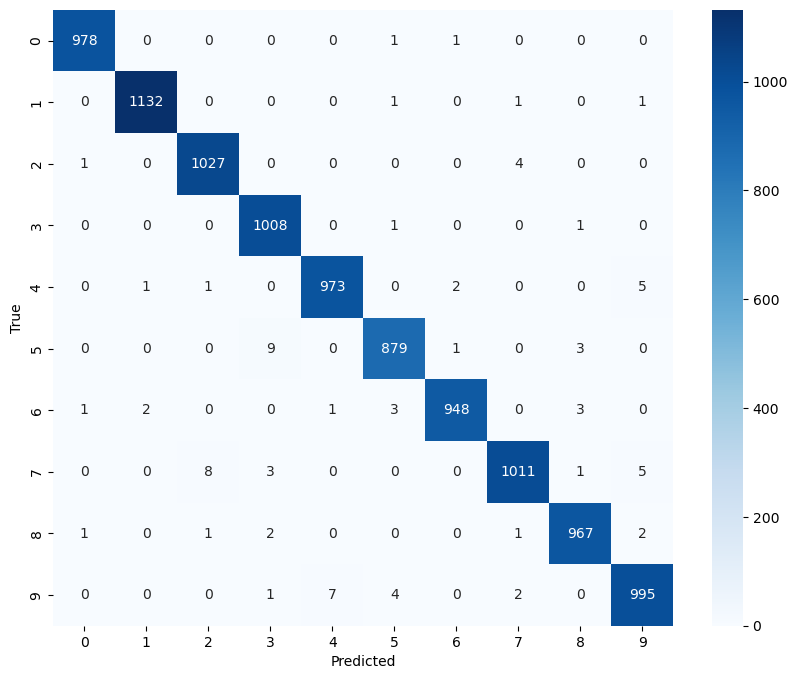

In [18]:
# Confusion matrix and full classification report
all_labels = []
all_predictions = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.cpu().numpy())
cm = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(all_labels, all_predictions))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')

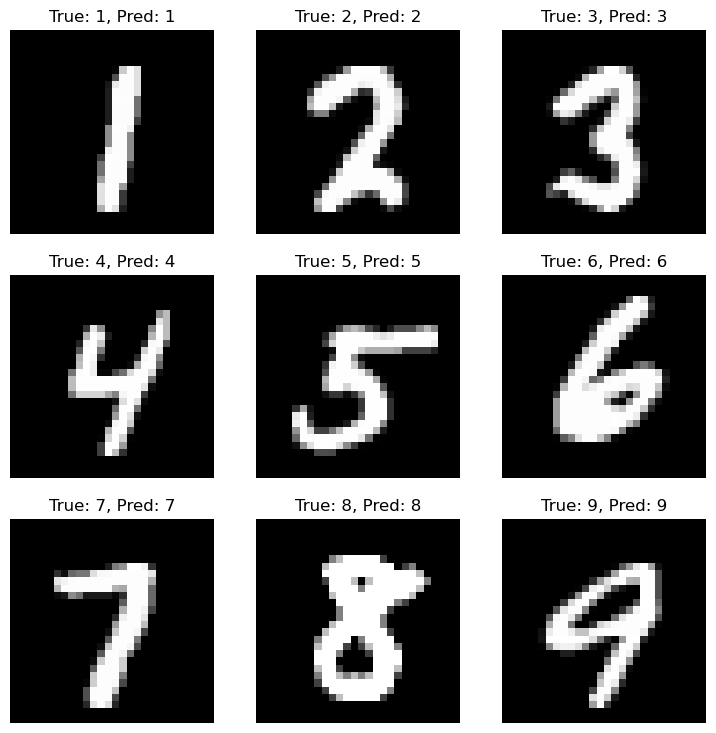

In [19]:
# Visualize some predictions
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    images, labels, predicted = images.cpu(), labels.cpu(), predicted.cpu()
    pass
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax.axis('off')
plt.show()

In [20]:
# Export the model to ONNX format
batch_size = 1 # Define the batch size for export to ONNX (usually 1)
dummy_input = torch.randn(batch_size, 1, 28, 28).to(device)
torch.onnx.export(model, # model being run
                  dummy_input, # model input (or a tuple for multiple inputs)
                  "mnist_model.onnx", # where to save the model (can be a file or file-like object)
                  export_params=True, # store the trained parameter weights inside the model file
                  opset_version=11, # the ONNX version to export the model to
                  do_constant_folding=True, # whether to execute constant folding for optimization
                  input_names=['input'], # the model's input names
                  output_names=['output'], # the model's output names
                  dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}, # variable length axes
                  verbose= True # print the model graph
                  )
print("Model has been converted to ONNX format and saved as mnist_model.onnx")

Model has been converted to ONNX format and saved as mnist_model.onnx
